<a href="https://colab.research.google.com/github/biplab37/Masters-Thesis/blob/master/code/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical solution for the differential equation
---

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Coupled Equations
---


$$\partial_{\Lambda}v(k) = -\frac{e^2}{2\pi} \frac{1}{k} \int_{0}^{\pi} d\phi \frac{ \cos(\phi)}{\epsilon_{\Lambda}(\Lambda)\sqrt{1-2(k/\Lambda)\cos(\phi) + (k/\Lambda)^2}}$$

In [0]:
def vel(phi,momentum,cutoff,epsilon):
    '''
    Returns the integrand of the velocity differential equation at given 
    value of momentum, cutoff phi and epsilon
    '''
    cphi = np.cos(phi)
    return cphi/(epsilon*momentum*np.sqrt(1 - 2*cphi*momentum/cutoff + (momentum/cutoff)**2))

def dielectric(phi,momentum,cutoff,vel_1,vel_2):
    '''
    Returns the integrand of the dielctric function differential equation
    at given value of momentum, cutoff, phi and two velocities
    '''
    cphi = np.cos(phi)
    sphi = np.sin(phi)
    return 2*pi*(momentum*sphi**2)/(((vel_1+vel_2)*cutoff + momentum*vel_2*cphi)*np.sqrt(-momentum**2*sphi**2 + 4*cutoff**2+ 4*momentum*cutoff*cphi))

In [0]:
n = 200 ## Number of points for cutoff
m = 23  ## Number of points for momentum
num = 1000  ## Number of points taken for phi integration
dcutoff = 1./n 
pi = 3.1415

## velocity and dielectric function are initiallised to 1
velocity = np.ones((n,m))
eps = np.ones((n,m))

for i in range(n-1):
    ## loop over cutoff
    cutoff = (n-i-1)/n  ## We start from the highest cutoff 1
    for j in range(m):
        ## loop over momentum
        momentum = (j+1)/m

        ## intialisation
        integral_vel = 0
        integral_eps = 0

        for k in range(num):
            ## phi integration
            phi = k*pi/num
            cphi = np.cos(phi)

            ''' To get index for the second velocity if it is beyond the cutoff limit 
            value at highest cutoff i.e. 1 is used'''
            k1 = n-1
            if cutoff + momentum*cphi<1:
                k1 = int((cutoff+momentum*cphi)*m)
            
            ## dielctric function phi integral
            if cphi>1-(2*cutoff/momentum): ## theta function implementation
                integral_eps += dielectric(phi/2,momentum,cutoff,velocity[n-i-1][j],velocity[k1][j])
            
            ## velocity phi integral
            integral_vel += vel(phi,momentum,cutoff,eps[n-i-1][j])

        ## Updating velocity and dielctric function
        velocity[n-i-2][j] = velocity[n-i-1][j] + dcutoff*integral_vel/num
        eps[n-i-2][j] = eps[n-i-1][j] + dcutoff*integral_eps/num

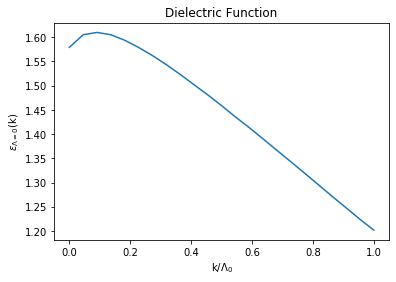

In [59]:
momentumaxis = np.linspace(0,1,num=m)
plt.plot(momentumaxis,eps[0,:])
plt.title('Dielectric Function')
plt.xlabel(r'k/$\Lambda_0$')
plt.ylabel(r'$\epsilon_{\Lambda=0}$(k)')
plt.show()

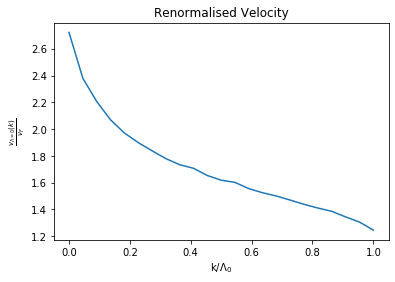

In [62]:
plt.plot(momentumaxis,velocity[0])
plt.title('Renormalised Velocity')
plt.xlabel(r'k/$\Lambda_0$')
plt.ylabel(r'$\frac{v_{\Lambda=0}(k)}{v_F}$')
plt.show()